In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

# Files are accessed after from local drive after mounting
# To run on another system same thing would have to be done
# Folder and file names should be changed accordingly

%cd /content/drive/MyDrive/CS5691_PRML/Assignment_2/

/content/drive/MyDrive/CS5691_PRML/Assignment_2


In [3]:
# Importing the dataset2
dataset2 = pd.read_csv('Dataset2/train_data.csv')

X2 = dataset2.iloc[:, 0].values
y2 = dataset2.iloc[:, 1].values
X_2 = dataset2.iloc[:, 0:2].values

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


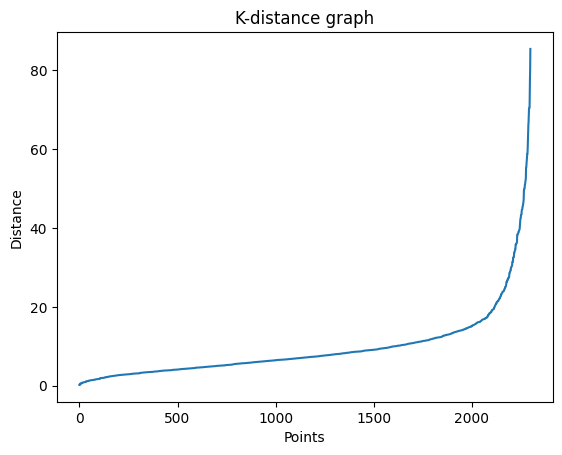

In [5]:
# K-distance vs epsilon graph
minPts = 4
k = 2

nn = NearestNeighbors(n_neighbors=k)
nn_fit = nn.fit(X_2)
distances, indices = nn_fit.kneighbors(dataset2)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance graph')
plt.xlabel('Points')
plt.ylabel('Distance')

# Elbow around 20, so range of epsilon selected from 15 to 25 with 1 as the difference
epsilon = np.arange(15, 26, 1, dtype = float)

plt.show()

In [6]:
from scipy.spatial import distance # For finding euclidean distance
class DBSCAN:

  def __init__(self, epsilon = None, min_samples = None, distance = 'euclidean', normalize = False):
    self.epsilon = epsilon
    self.min_samples = min_samples
    self.distance = distance
    self.normalize = normalize

  def find_distance(self, x, type = 'euclidean'):
    # Finds distance between numpy arrays.
    return distance.squareform(distance.pdist(x, type))

  def normalization(self, x):
    return (x-np.min(x))/(np.max(x) - np.min(x))

  def find_neighbors(self, x):
    return np.where(x <= self.epsilon)[0]
  
  def expand_cluster(self, neighbors, x, cluster, labels):

    # Iterate over each neighbor
    for neighbor in neighbors:
      
      # Check that is not assigned
      if labels[neighbor] == 0:

        # Find neighbors
        neighbor_neighbors = self.find_neighbors(x[neighbor])
        
        # Check if is core
        if len(neighbor_neighbors) >= self.min_samples:
            labels[neighbor] = cluster

            # For each neighbor in neighbors, expand cluster
            labels = self.expand_cluster(neighbor_neighbors, x, cluster, labels)
      
    return labels

  def fit(self, x):
    # Given a reference point and comparison points and a distance function, returns the index of the neighbors.
    
    # Do normalization
    if self.normalize:
      x = self.normalization(x)

    # Find distance
    dist_matrix = self.find_distance(x, self.distance)

    # Initialize cluster
    cluster = 1
    n_obs = x.shape[0]
    labels = np.zeros(n_obs)

    for i in range(n_obs):
    
      # If value not assigned
      if labels[i] == 0:
        
        # Find neighbors
        neighbors = self.find_neighbors(dist_matrix[i])

        # Check if neighbors > min_samples (self included as neighbor)
        if len(neighbors) > self.min_samples:
        
          # If observation is not assigned --> Assign to cluster
          if labels[i] == 0:
            labels[i] = cluster

          # Expand cluster on neighbors
          labels = self.expand_cluster(neighbors, dist_matrix, cluster, labels)

          # Go to next cluster          
          cluster = cluster + 1

    return labels

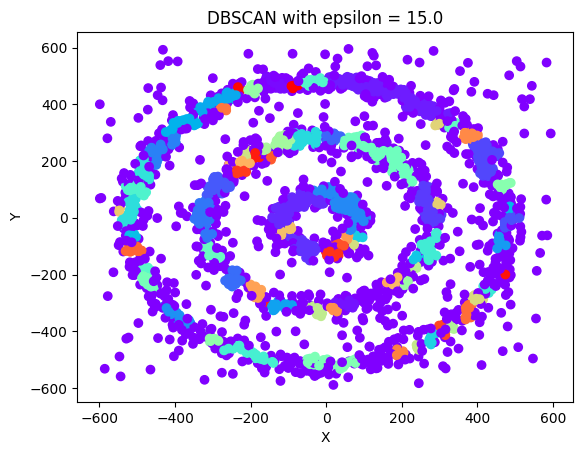

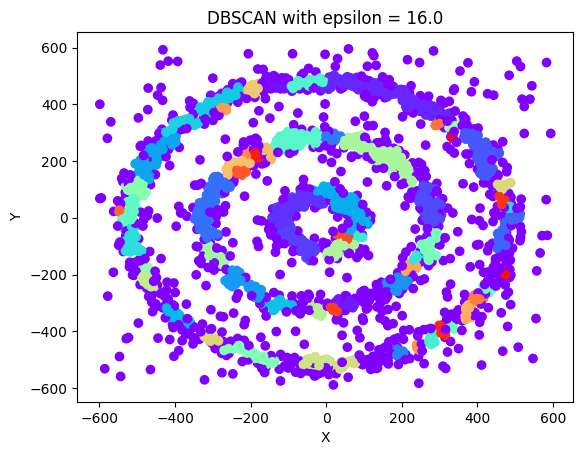

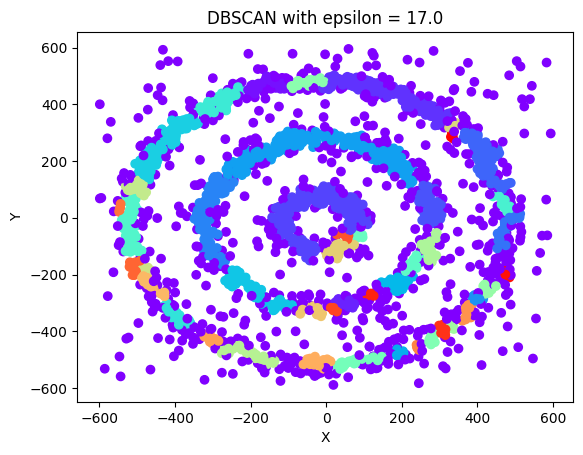

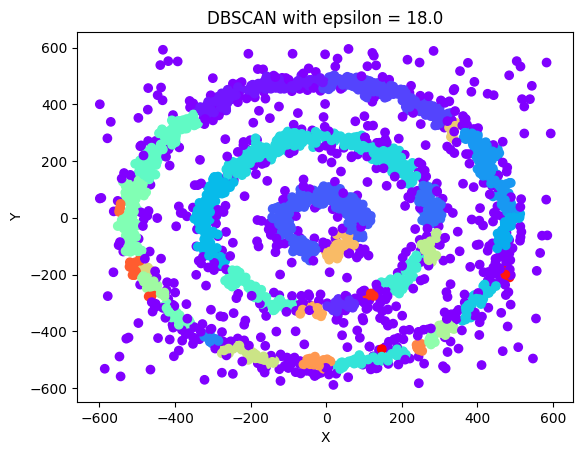

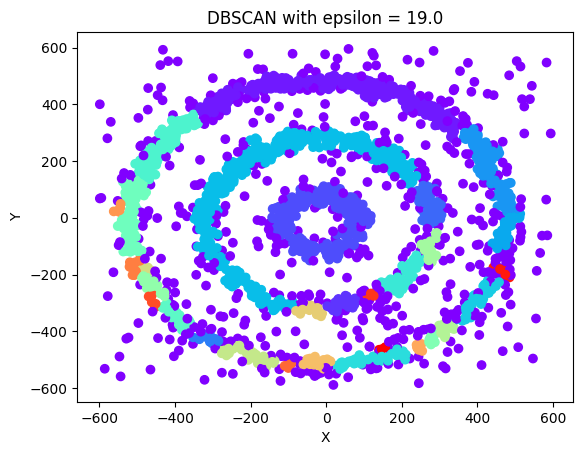

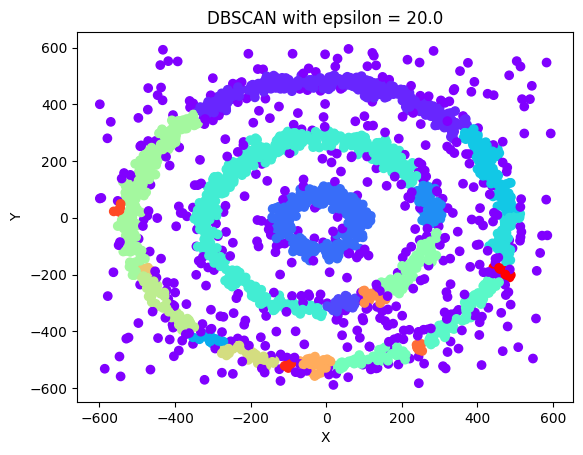

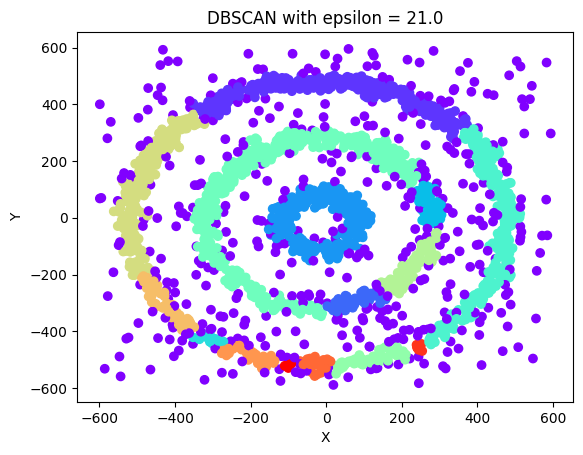

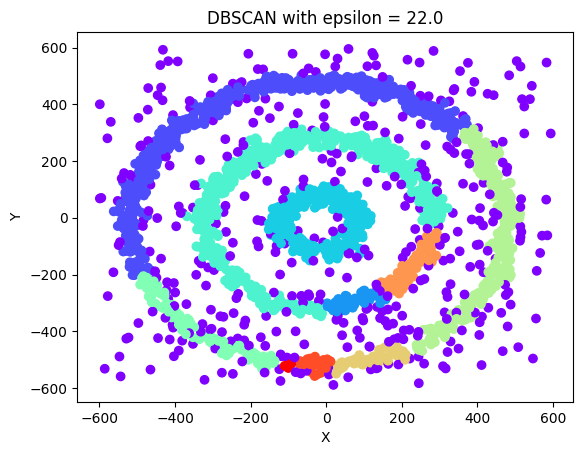

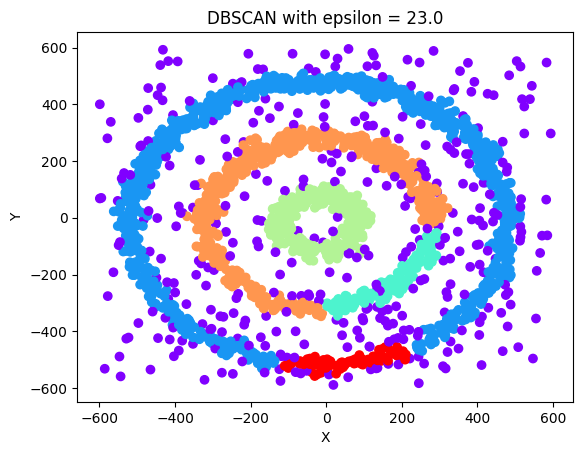

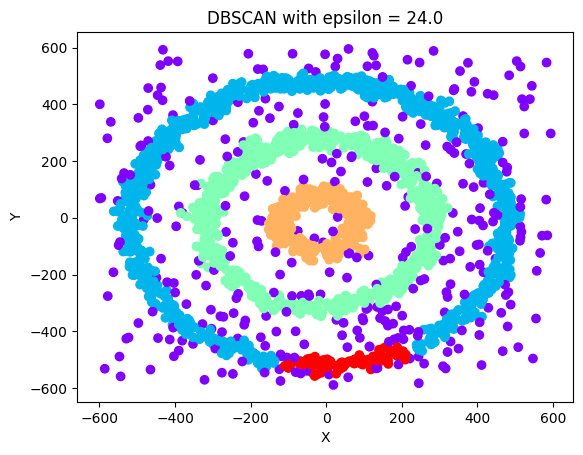

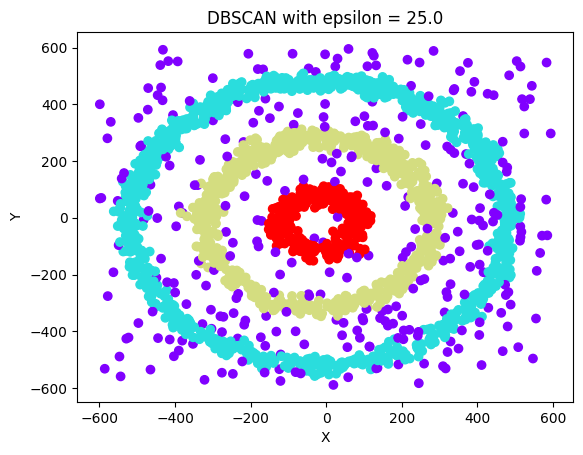

In [7]:
# Applying DBSCAN to the dataset
for eps in epsilon:
    pred = DBSCAN(epsilon = eps, min_samples = minPts).fit(X_2)
    plt.scatter(X2, y2, c=pred,cmap='rainbow')
    plt.title('DBSCAN with epsilon = ' + str(eps))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Number of clusters formed:  16


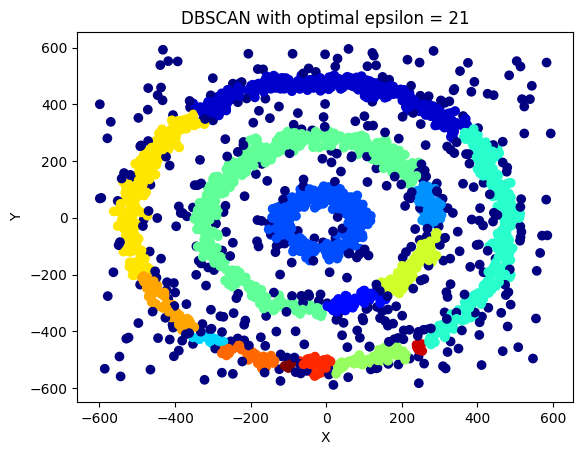

In [8]:
# Optimal Value of epsilon is 21
pred = DBSCAN(epsilon = 21, min_samples = minPts).fit(X_2)
print("Number of clusters formed: ", len(np.unique(pred)))
plt.scatter(X2, y2, c=pred,cmap='jet')
plt.title('DBSCAN with optimal epsilon = 21')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


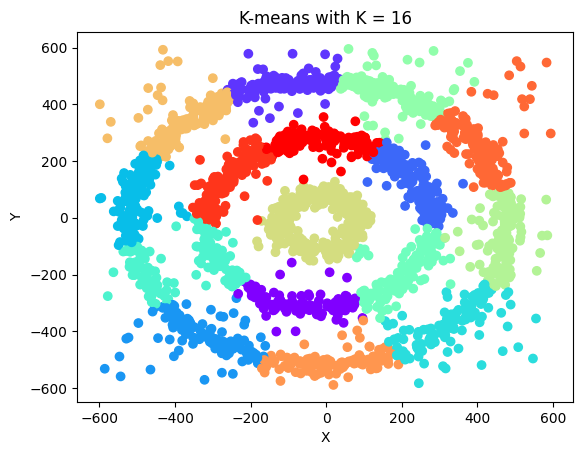

In [9]:
# Apply K-means to the dataset with K = 16
kmeans = KMeans(n_clusters = 16, init = 'k-means++', random_state = 17)
y_kmeans = kmeans.fit_predict(X_2)
plt.scatter(X2, y2, c=y_kmeans,cmap='rainbow')
plt.title('K-means with K = 16')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
# Importing the dataset3
dataset3 = pd.read_csv('Dataset3/train_data_2.csv')

X3 = dataset3.iloc[:, 0].values
y3 = dataset3.iloc[:, 1].values
X_3 = dataset3.iloc[:, 0:2].values

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


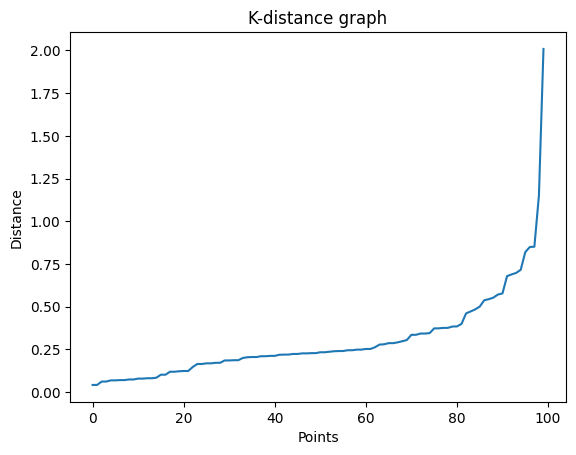

In [12]:
# Do the same for Dataset 3
# K-distance vs epsilon graph
minPts = 15
k = 2

nn = NearestNeighbors(n_neighbors=k)
nn_fit = nn.fit(X_3)
distances, indices = nn_fit.kneighbors(dataset3)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance graph')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

# Elbow around 0.50, so range of epsilon selected from 0.4 to 0.9 with 0.05 as the difference
epsilon = np.arange(0.4, 1, 0.05, dtype = float)

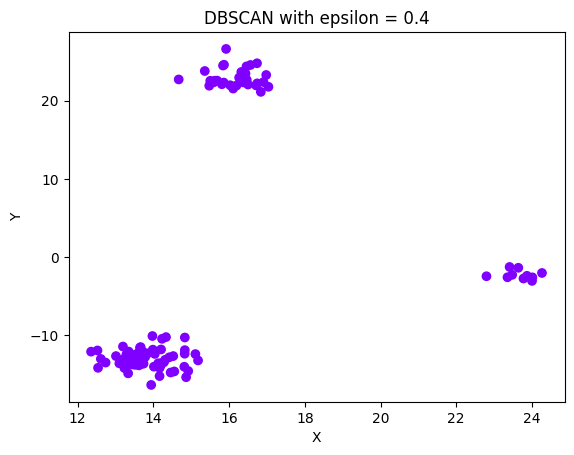

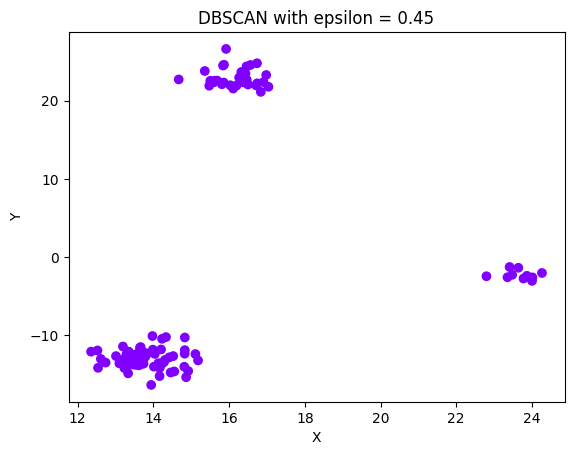

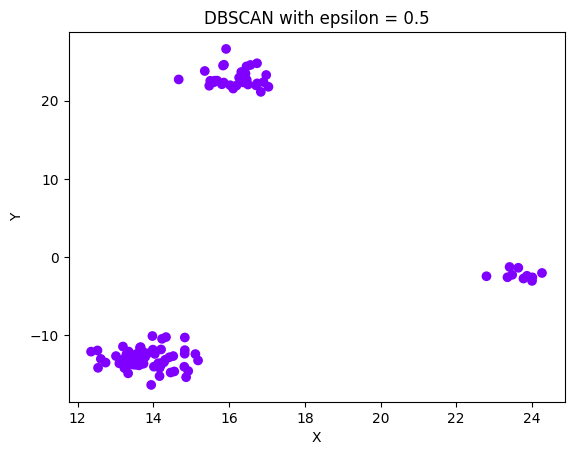

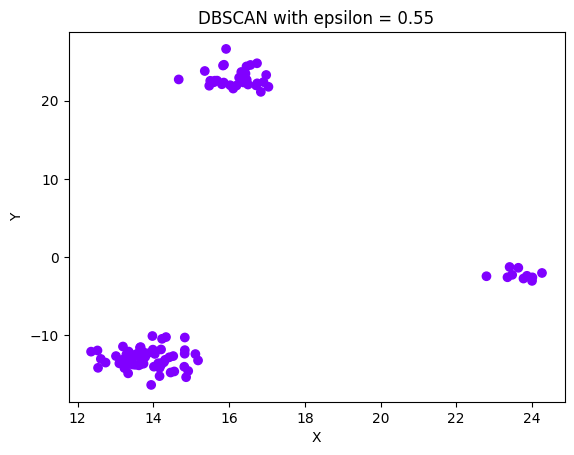

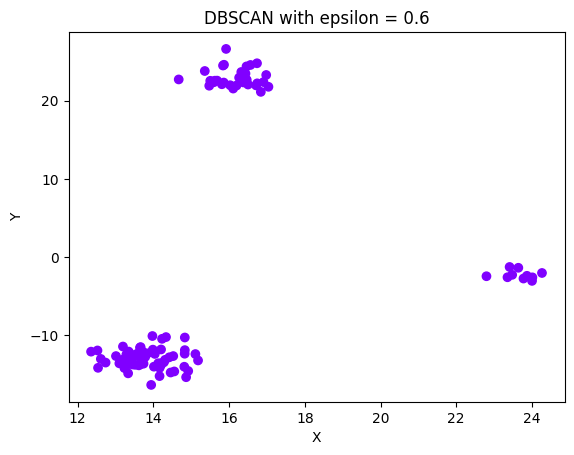

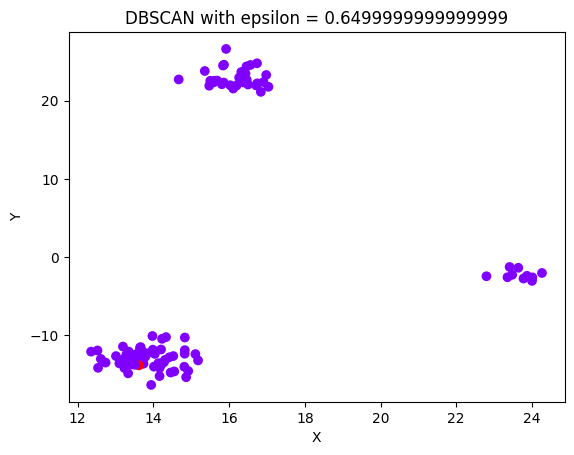

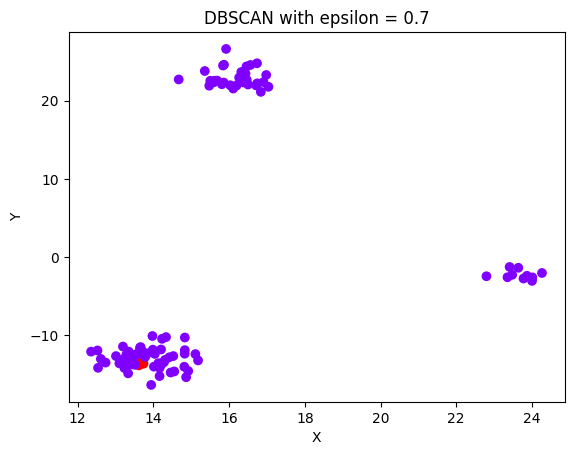

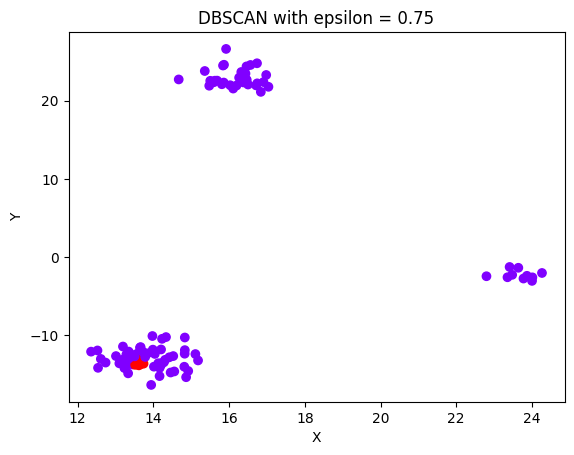

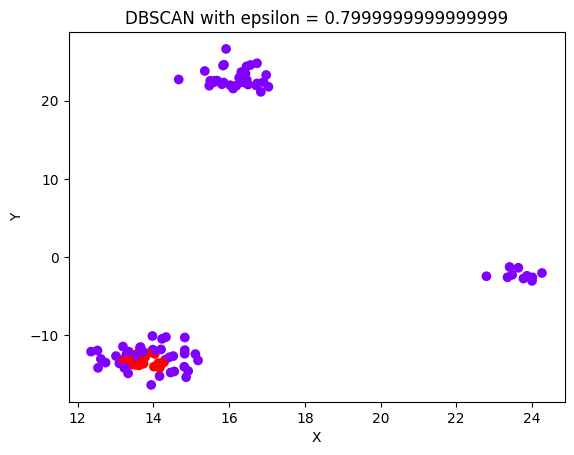

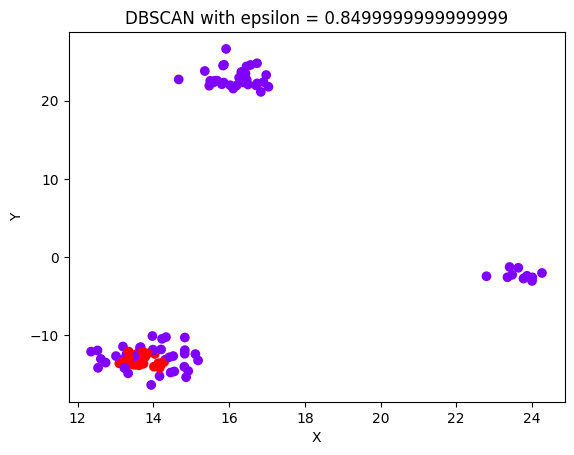

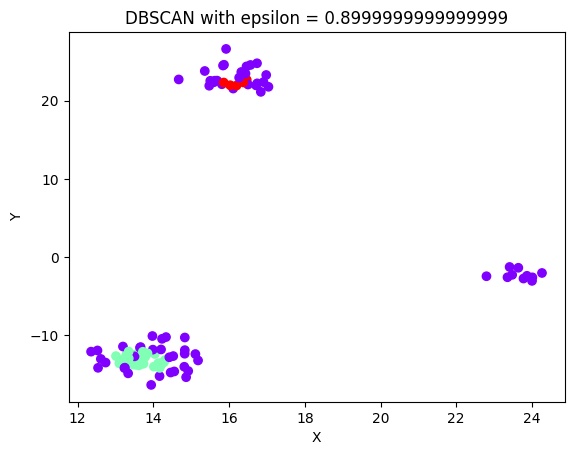

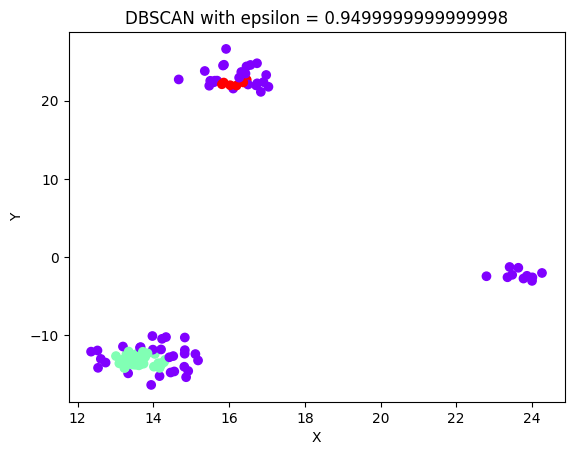

In [13]:
# Applying DBSCAN to the dataset
for eps in epsilon:
    pred = DBSCAN(epsilon = eps, min_samples = minPts).fit(X_3)
    plt.scatter(X3, y3, c=pred,cmap='rainbow')
    plt.title('DBSCAN with epsilon = ' + str(eps))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Number of clusters formed:  1


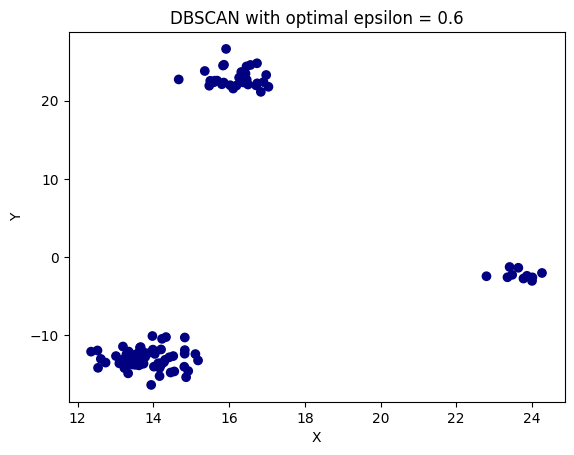

In [14]:
# Optimal Value of epsilon is 0.6
pred = DBSCAN(epsilon = 0.6, min_samples = minPts).fit(X_3)
print("Number of clusters formed: ", len(np.unique(pred)))
plt.scatter(X3, y3, c=pred,cmap='jet')
plt.title('DBSCAN with optimal epsilon = 0.6')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


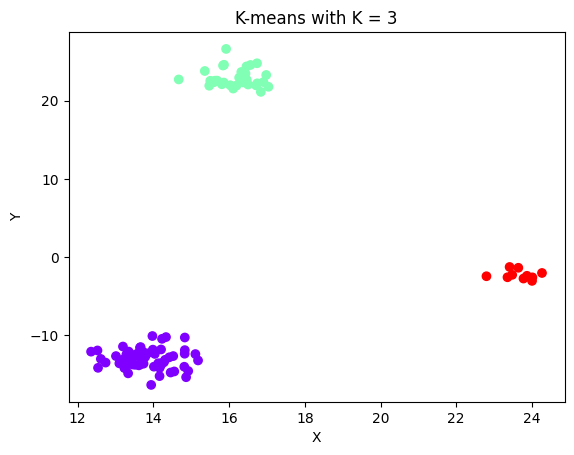

In [15]:
# Apply K-means to the dataset with K = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 17)
y_kmeans = kmeans.fit_predict(X_3)
plt.scatter(X3, y3, c=y_kmeans,cmap='rainbow')
plt.title('K-means with K = 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()